In [27]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

PATH = "data/yXtrain.csv"
DELIMITER = ","

def get_data(path, delimiter):
    """
    Gets data from the file 'path' with delimeter 'delimiter' where y is a vector of length n and X is n x p matrix.
    """
    dataframe = pd.read_csv(path, delimiter=delimiter)
    array = dataframe.to_numpy()
    y = array[:, 1]
    X = array[:, 2:]
    return X, y

def get_train_data():
    """
    Gets training data.
    """
    return get_data(PATH, DELIMITER)

def get_remainder():
    """
    Gets remainder
    """
    dataframe = pd.read_csv("data/project_remainder.csv")
    array = dataframe.to_numpy()
    return array


def train_val_split(X, y, val_start, val_end):
    """
    Splits data into training and validation datasets.
        Parameters:
        - X (np.array): Matrix of data, shape n x p.
        - y (np.array): Vector of targets, size n.
        - val_start (int): Start index for the validation dataset.
        - val_end (int): End index for the validation dataset.
        Returns:
        - X_train (np.array): Matrix of data, shape n_train x p.
        - y_train (np.array): Vector of targets, size n_train.
        - X_val (np.array): Matrix of data, shape n_val x p.
        - y_val (np.array): Vector of targets, size n_val.
    """
    X_val = X[val_start:val_end]
    y_val = y[val_start:val_end]
    X_train = torch.cat((X[:val_start], X[val_end:]))
    y_train = torch.cat((y[:val_start], y[val_end:]))
    return X_train, y_train, X_val, y_val


In [28]:
X, y = get_train_data()
remainder = get_remainder()

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

"""
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.output_layer(x)
        return x
    
"""
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer2(x))
        x = self.output_layer(x)
        return x
        


In [32]:
input_size = 50
output_size = 1

# Define loss function and optimizer
criterion = nn.MSELoss()


# Sample input and target data 
sample_input = torch.from_numpy(X).to(torch.float32)
target_output = torch.from_numpy(remainder).to(torch.float32)

def cross_validation(n_neurons):
    global criterion
    global sample_input
    global target_output
 
    
    loss_array = []
    
    for i in range(399, 2000, 400):   
        model = NeuralNetwork(50, n_neurons, 1)
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        input_train, output_train, input_val, output_val = train_val_split(sample_input, target_output, i-399, i)   
        for epoch in range(1000):
            # Forward pass
            output = model.forward(input_train)

            # Compute the loss
            loss = criterion(output, output_train)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Test on validation set
        predicted_output = model(input_val)
        val_loss = criterion(predicted_output, output_val)
        loss_array.append(val_loss.detach().numpy())
    return np.mean(loss_array)

    

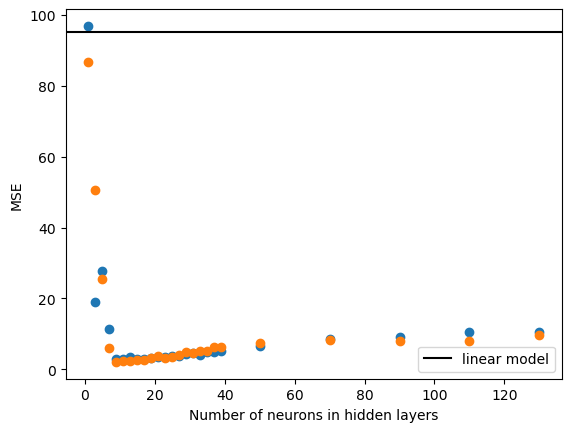

In [26]:
input_space = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 50, 70, 90, 110, 130, 150, 200, 250, 300]
plt.scatter(input_space[:-4], CV_NN[:25])
plt.scatter(input_space[:-4], CV_NN[29:-4])
#plt.scatter([i for i in range(1, 41, 2)], CV_NN_2)
#plt.axhline(y = 93.26049206165104, label = "line of overfitting", ls = '--' )
plt.axhline(y = 95.13726920491817, label = "linear model", color = "black" )
plt.xlabel("Number of neurons in hidden layers")
plt.ylabel("MSE")
plt.legend()
plt.show()